In [12]:
from research_tools.research_tools import run_pipeline, make_factor_plot, make_quantile_plot
from research_tools.ics.ics_scheme import Sector
from research_tools.fundamentals.fundamentals import Fundamentals
from zipline.pipeline.data import USEquityPricing as USEP
from zipline.pipeline.factors import Returns, AverageDollarVolume
from zipline.pipeline import Pipeline

In [14]:
universe = AverageDollarVolume(window_length=120).top(500)
my_factor = (
    -Returns(mask=universe, window_length=5).
    demean(groupby=Sector()).
    rank()
)

p = Pipeline(screen=universe)
p.add(USEP.close.latest, "Price")
p.add(my_factor, '5d_MR_Sector_Neutral_Rank')
p.add(Fundamentals.MarketCap.latest.zscore(), 'MCAP')
p.add(Fundamentals.PriceToBook.latest.zscore(), 'PB')

start_date = '2017-01-04'
end_date = '2017-12-28'

df = run_pipeline(p, start_date, end_date)


In [15]:
df

5d_MR_Sector_Neutral_Rank  \
2017-01-04 00:00:00+00:00 Equity(0 [A])                           -275.0   
                          Equity(2 [AAL])                          -10.0   
                          Equity(7 [AAP])                         -289.0   
                          Equity(8 [AAPL])                        -113.0   
                          Equity(12 [ABBV])                       -207.0   
                          Equity(13 [ABC])                        -447.0   
                          Equity(20 [ABT])                        -363.0   
                          Equity(37 [ACN])                        -258.0   
                          Equity(45 [ADBE])                       -176.0   
                          Equity(48 [ADI])                         -69.0   
                          Equity(49 [ADM])                        -364.0   
                          Equity(52 [ADP])                        -367.0   
                          Equity(53 [ADS])                        -332.0   
                          Equity(54 [ADSK])                       -371.0   
                          Equity(66 [AEO])                        -439.0   
                          Equity(67 [AEP])                        -204.0   
                          Equity(71 [AET])                         -25.0   
                          Equity(77 [AFL])                        -106.0   
                          Equity(85 [AGN])                        -450.0   
                          Equity(98 [AIG])                         -32.0   
                          Equity(109 [AKAM])                      -281.0   
                          Equity(114 [AKS])                       -116.0   
                          Equity(116 [ALB])                       -209.0   
                          Equity(126 [ALK])                        -47.0   
                          Equity(128 [ALL])                       -149.0   
                          Equity(136 [ALXN])                       -24.0   
                          Equity(138 [AMAT])                       -18.0   
                          Equity(145 [AMD])                         -8.0   
                          Equity(146 [AME])                       -143.0   
                          Equity(149 [AMGN])                      -391.0   
...                                                                  ...   
2017-12-28 00:00:00+00:00 Equity(3045 [VZ])                       -405.0   
                          Equity(3055 [WAT])                       -54.0   
                          Equity(3056 [WBA])                      -177.0   
                          Equity(3066 [WDAY])                     -410.0   
                          Equity(3067 [WDC])                       -95.0   
                          Equity(3070 [WEC])                      -366.0   
                          Equity(3077 [WFC])                      -346.0   
                          Equity(3085 [WHR])                      -432.0   
                          Equity(3095 [WLL])                      -455.0   
                          Equity(3098 [WLTW])                        NaN   
                          Equity(3099 [WM])                       -164.0   
                          Equity(3101 [WMB])                       -49.0   
                          Equity(3105 [WMT])                      -230.0   
                          Equity(3117 [WRK])                       -81.0   
                          Equity(3122 [WSM])                       -65.0   
                          Equity(3142 [WY])                        -68.0   
                          Equity(3143 [WYN])                         NaN   
                          Equity(3144 [WYNN])                     -256.0   
                          Equity(3145 [X])                         -98.0   
                          Equity(3148 [XEC])                      -430.0   
                          Equity(3149 [XEL])                      -235.0   
                   

Formatting factor data for: 5d_MR_Sector_Neutral_Rank
Dropped 1.2% entries from factor data: 1.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Formatting factor data for: MCAP
Dropped 1.2% entries from factor data: 1.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Formatting factor data for: PB
Dropped 1.2% entries from factor data: 1.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Time to get arrange factor data: 1.00 secs
Time to generate long/short returns: 0.54 secs


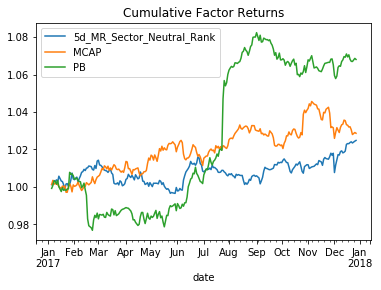

In [11]:
make_factor_plot(df, start_date, end_date);

Formatting factor data for: 5d_MR_Sector_Neutral_Rank
Dropped 1.2% entries from factor data: 1.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Formatting factor data for: MCAP
Dropped 1.2% entries from factor data: 1.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Formatting factor data for: PB
Dropped 1.2% entries from factor data: 1.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Time to get arrange factor data: 1.04 secs


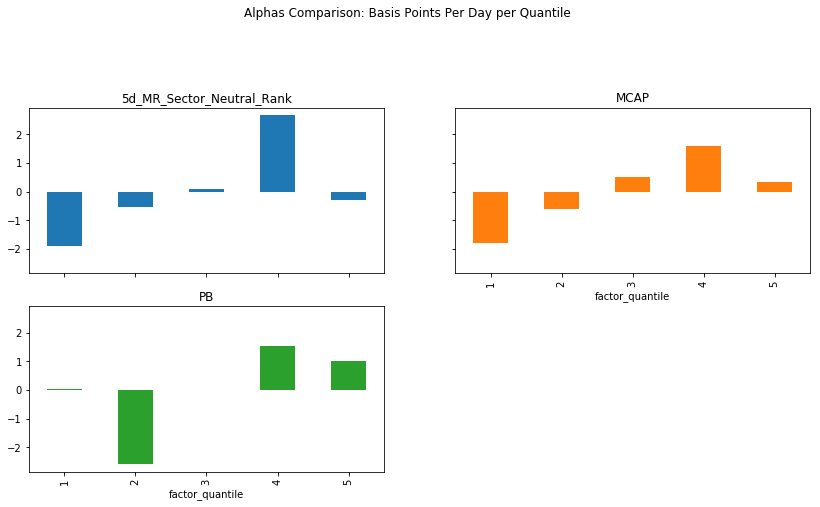

In [13]:
make_quantile_plot(df, start_date, end_date);